## Unsupervised learning

kmeans clustering of the iris dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 

Load the iris dataset and create a dataframe.

In [2]:
csv_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
col_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Class']
iris =  pd.read_csv(csv_url, names = col_names)

In [3]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data pre-processing
Create `x` and `y` matrices having the observations and labels respectively. The `x` matrix would comprise of only the values of all the features for all the samples. This would be used for training the machine learning model. The `y` matrix would have the labels correponding to the samples in the `x` matrix. The `y` matrix is used in supervised classification. The `x` matrix is a 2d array with shape *n_samples by n_features* while the `y` matrix is a one dimensional array.

In [4]:
x = iris.loc[:,iris.columns[0:4]].values
y = iris.loc[:,"Class"].values

In [5]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [70]:
## To get classes as int
y_int = pd.get_dummies(y).values.argmax(1)
y_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

**Finding optimal number of clusters**
Create a kmeans object with specific values for different hyperparameters. The next step is to fit our data matrix ie `x` to the classifier.

In [17]:
from sklearn.cluster import KMeans
wcss = [] #within cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

### The elbow methods

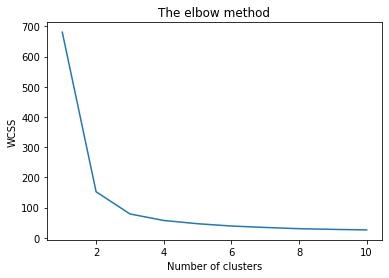

In [18]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

Using the kmeans model to predict the labels of the `x` matrix. The `fit_predict()` function predict the label of the given data. It returns an array of labels corresponding to the each data point (sample).

In [6]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [13]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [8]:
#get centers for each of the clusters
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [51]:
#predicting the cluster of an unknown observation
kmeans.predict([[5.1,3.,1.4,0.2]])

array([1], dtype=int32)

**Compare the predicted labels with the original labels.**

The predicted labels could be in any order ie the cluster are numbered randomly. So to compare the predicted cluster with the original labels, we need to take into account this characteristic of the clustering function. The `adjusted_rand_score()` function compares the members of different cluster in context of the cluster labels.

In [52]:
from sklearn.metrics import adjusted_rand_score

In [69]:
#kmeans.labels_ has the original labels
adjusted_rand_score(y, kmeans.labels_)

0.7302382722834697

Plot using first two features

In [9]:
import seaborn as sns

In [22]:
iris_predicted = iris.copy()
iris_predicted["Predicted_Class"] = y_kmeans
iris_predicted.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class,Predicted_Class
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


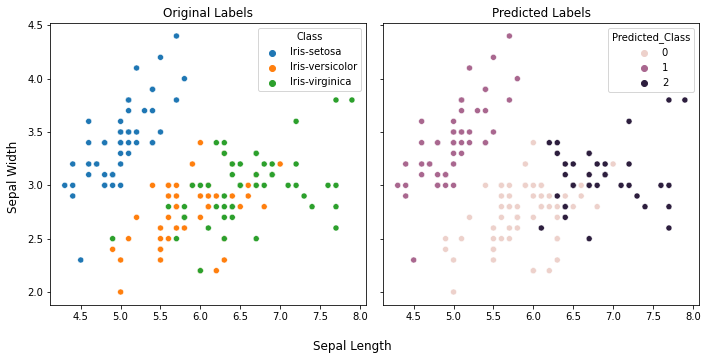

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)

ax[0].set_title("Original Labels")
sns.scatterplot(data=iris_predicted, x="Sepal_Length", y="Sepal_Width", ax=ax[0], hue="Class")
ax[0].set_xlabel("")
ax[0].set_ylabel("")


ax[1].set_title("Predicted Labels")
sns.scatterplot(data=iris_predicted, x="Sepal_Length", y="Sepal_Width", ax=ax[1], hue="Predicted_Class")
ax[1].set_xlabel("")

fig.supxlabel("Sepal Length")
fig.supylabel("Sepal Width")

plt.tight_layout()


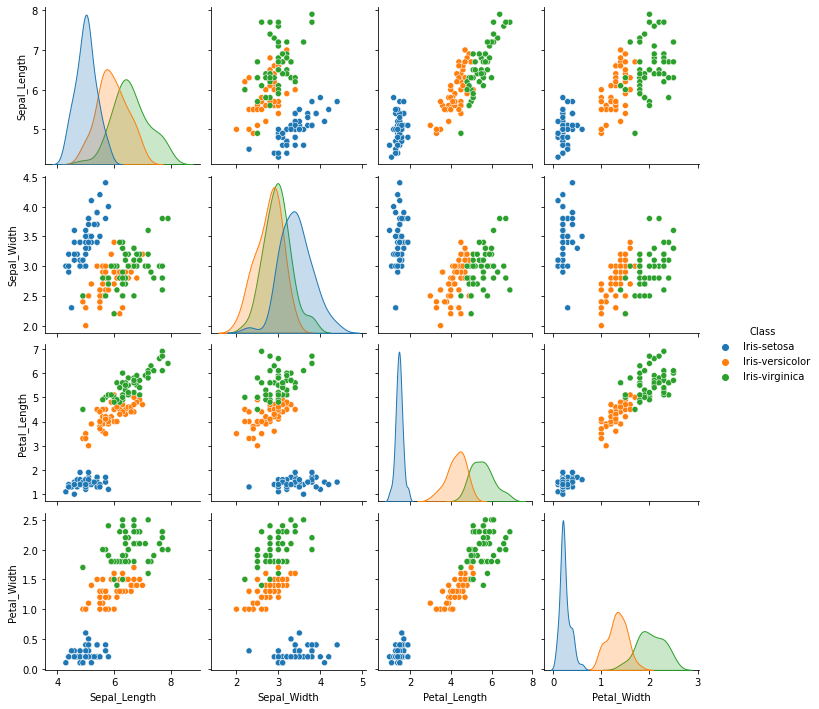

In [131]:
sns.pairplot(data=iris, hue="Class")